## Gradient Boosting
Gradient Boosting in Machine Learning is used for both regression and classification task. It builds an ensemble of weak learners, typically decision trees, in a stage wise manner or sequentially, optimizing for a loss function using gradient descent.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [21]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:,0] ** 2 + 0.05 * np.random.randn(100)

In [22]:
df = pd.DataFrame()
df['X'] = X.reshape(100)
df['y'] = y
df.head()

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


Text(0.5, 1.0, 'X vs y')

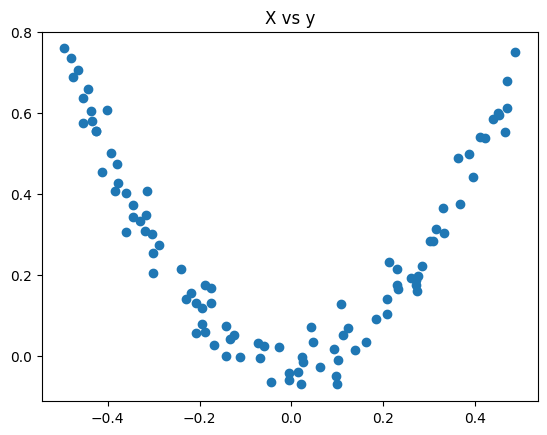

In [23]:
plt.scatter(df['X'], df['y'])
plt.title('X vs y')

## Algorithm for the Gradient Boosting
We use to train the base models, however in boosting the next model correct the error of the previous one. So, here we will train 3 base models.

- `Model 1 (m1)`: It is the mean of the original output in the dataset.
Now we will calculate the performance our first model. To calculate the performance we need a loss function and that loss function will tell to the another model that this model has done some error.
```
Updated columns: {iq, cgpa, salary, pred1}
```

Loss function to `Model 2` (m2) will give the report that how `Model 1` has done mistakes.

```
Updated columns: {iq, cgpa, salary, pred1, res1}
```

Loss Prediction = (Actual - Predicted). This is the also called as Pseudo residual in Gradient Boosting.

    - new inputs: {iq, cgpa}
    - new output: {res1} => residual of model 1

- `Model 2 (m2)`: Now we will make the decision tree on the fields of: {iq, cgpa, res1}. We are not predicting the package. We are predicting how the model 1 has done the error. Quantity of error.
A new column will be added called: pred2

```
Updated columns (after prediction): {iq, cgpa, salary, pred1, res1, pred2}
```
```
Calculating the residual:
res2 = m1_output + learning_rate * m2_output

where:
1. m1_output = pred 1
2. m2_output = pred 2
```
```
Updated columns (after residual): {iq, cgpa, salary, pred1, res1, pred2, res2}
```

```
New Input and Output that will be forward to 3rd base Model

- new inputs: {iq, cgpa}
- new output: {res2}
```

- `Model 3 (m3)`: Again same as Model 2, make the decision tree predict each row and name the column as `pred 3` and also calculate the residual for it.

```
Updated columns (after prediction): {iq, cgpa, salary, pred1, res1, pred2, res2, pred3}
```
```
Calculating the residual:
res2 = m1_output + (learning_rate * m2_output) + (learning_rate * m3_output)

where:
1. m1_output = pred 1
2. m2_output = pred 2
3. m3_output = pred 3
```
```
Updated columns (after residual): {iq, cgpa, salary, pred1, res1, pred2, res2, pred3, res3}
```

And so on...

If there is 20 base models this is how it will go and forth the previous model residuals.

`Number of base models = Number of Iterations`

**NOTE:** Mathematics concept is in the copy.

****

What is there are multiple base models?

```
Suppose base models are = n_base_models

Residual Formula will be:

res_n = m1_output + (learning_rate * m2_output) + (learning_rate * m3_output) + (learning_rate * m4_output) + ..... + (learning_rate * mn_output)

res_n = m1_output + learning_rate * (m2_output + m3_output + m4_output + .... mn_output)
```

## Model 1

Basically its a mean. Lets calculate it

1. Mean
2. Residual = (Actual - Predicted)

In [24]:
df['pred1'] = df['y'].mean()
df.head()

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458


In [25]:
df['res1'] = df['y'] - df['pred1']
df.head()

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


Text(0.5, 1.0, 'X vs y')

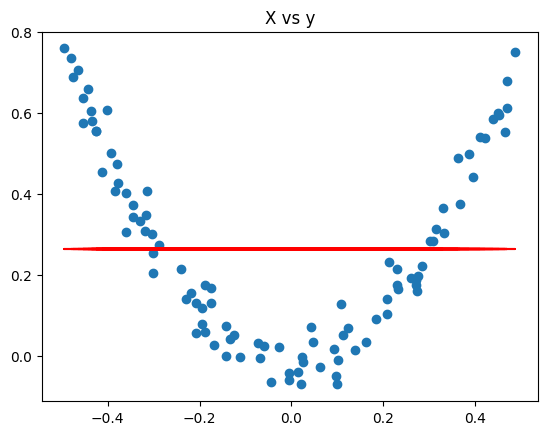

In [26]:
plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['pred1'], color = 'red')
plt.title('X vs y')

## Model 2

In [27]:
first_model = DecisionTreeRegressor(max_leaf_nodes = 8) # We are not using Decision Stumps, You can use in range of leaf nodes = [8 - 32]
first_model.fit(df['X'].values.reshape(100, 1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

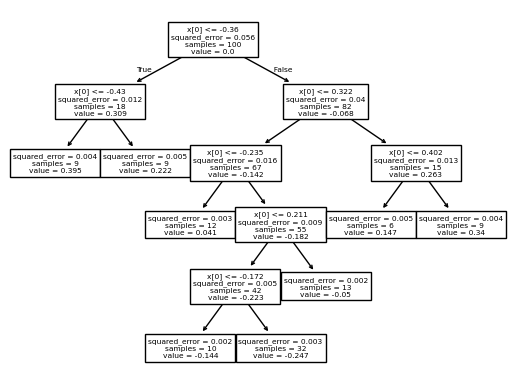

In [28]:
plot_tree(first_model)
plt.show()

In [29]:
# Generating X_test
X_test = np.linspace(-0.5, 0.5, 500)

In [30]:
y_pred = 0.265458 + first_model.predict(X_test.reshape(500, 1))

Text(0.5, 1.0, 'Prediction of Model 1 + Model 2')

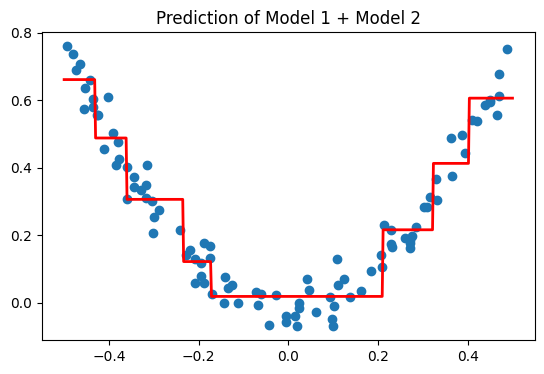

In [31]:
plt.figure(figsize = (14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth = 2, color = 'red')
plt.scatter(df['X'], df['y'])
plt.title("Prediction of Model 1 + Model 2")

In [32]:
df['pred2'] = 0.265458 + first_model.predict(df['X'].values.reshape(100, 1))
df.head()

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964


In [34]:
# Residual of Model 2
df['res2'] = df['y'] - df['pred2']
df.head()

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022


## Model 3

In [35]:
second_model = DecisionTreeRegressor(max_leaf_nodes = 8)
second_model.fit(df['X'].values.reshape(100, 1), df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [36]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [first_model, second_model])

Text(0.5, 1.0, 'Prediction of Model 1 + Model 2 + Model 3')

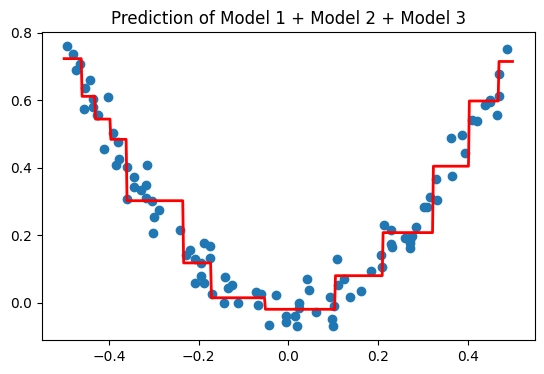

In [38]:
plt.figure(figsize = (14, 4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth = 2, color = 'red')
plt.scatter(df['X'], df['y'])
plt.title('Prediction of Model 1 + Model 2 + Model 3')

## General Function of Gradient Boosting

In [39]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return
  else:
    # do gradient boosting
    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

5


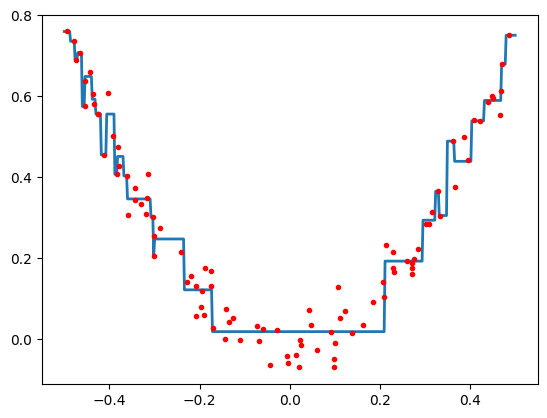

4


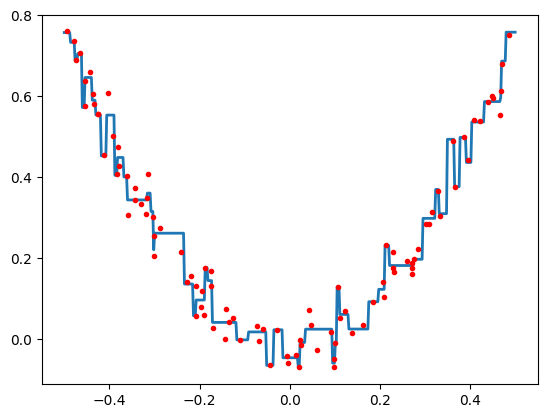

3


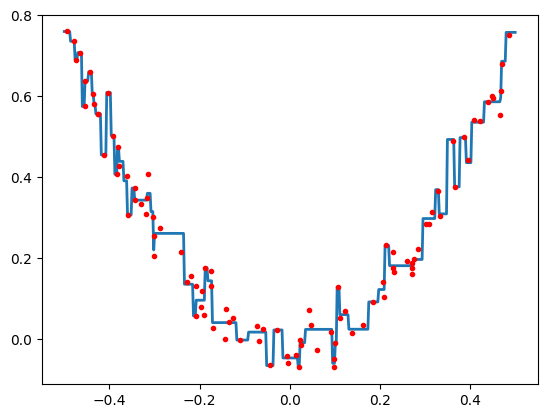

2


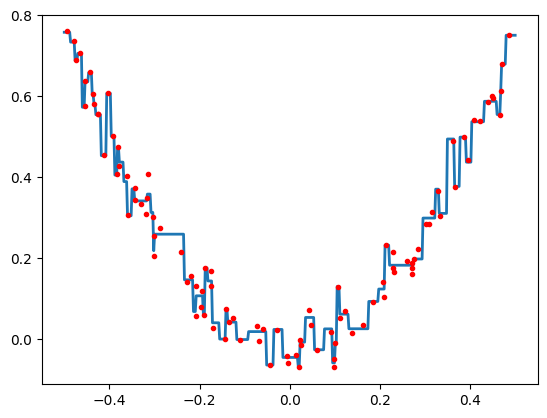

1


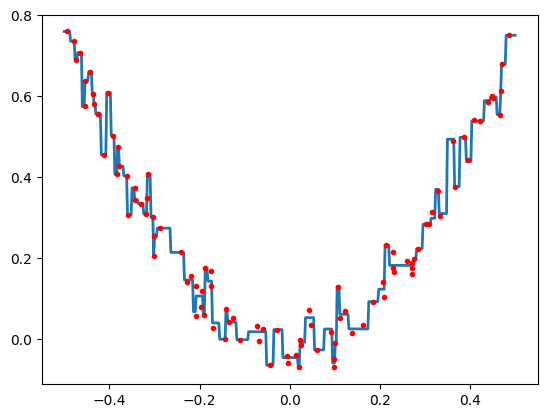

In [40]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)